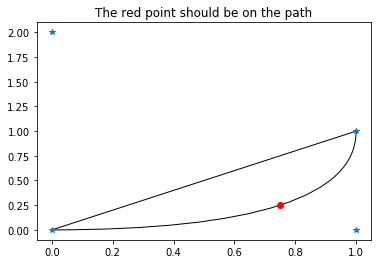

In [129]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Path = mpath.Path
Points = [[0, 0], [1, 0], [1, 1], [0, 2]]
fig, ax = plt.subplots()
pp1 = mpatches.PathPatch(
    Path(Points,
         [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CLOSEPOLY]),
    fc="none", transform=ax.transData)

ax.add_patch(pp1)
ax.plot([0.75], [0.25], "ro")
# ax.plot(Points[1],'*')
ax.set_title('The red point should be on the path')
plt.plot(*zip(*Points),'*')
plt.show();

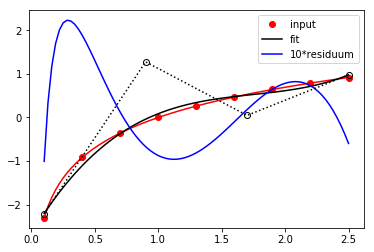

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb as n_over_k
Mtk = lambda n, t, k: t**k * (1-t)**(n-k) * n_over_k(n,k)
BézierCoeff = lambda ts: [[Mtk(3,t,k) for k in range(4)] for t in ts]

fcn = np.log
tPlot = np.linspace(0. ,1. , 81)
xPlot = np.linspace(0.1,2.5, 81)
tData = tPlot[0:81:10]
xData = xPlot[0:81:10]
data = np.column_stack((xData, fcn(xData))) # shapes (9,2)

Pseudoinverse = np.linalg.pinv(BézierCoeff(tData)) # (9,4) -> (4,9)
control_points = Pseudoinverse.dot(data)     # (4,9)*(9,2) -> (4,2)
Bézier = np.array(BézierCoeff(tPlot)).dot(control_points)
residuum = fcn(Bézier[:,0]) - Bézier[:,1]

fig, ax = plt.subplots()
ax.plot(xPlot, fcn(xPlot),   'r-')
ax.plot(xData, data[:,1],    'ro', label='input')
ax.plot(Bézier[:,0],
        Bézier[:,1],         'k-', label='fit')
ax.plot(xPlot, 10.*residuum, 'b-', label='10*residuum')
ax.plot(control_points[:,0],
        control_points[:,1], 'ko:', fillstyle='none')
ax.legend()
plt.show()


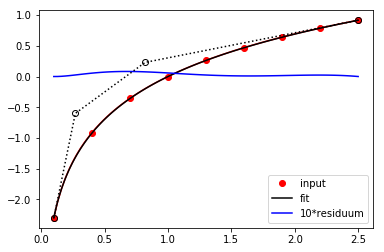

In [14]:
manual_points = np.array([[0.1,np.log(.1)],[.27,-.6],[.82,.23],[2.5,np.log(2.5)]])
Bézier = np.array(BézierCoeff(tPlot)).dot(manual_points)
residuum = fcn(Bézier[:,0]) - Bézier[:,1]

fig, ax = plt.subplots()
ax.plot(xPlot, fcn(xPlot),   'r-')
ax.plot(xData, data[:,1],    'ro', label='input')
ax.plot(Bézier[:,0],
        Bézier[:,1],         'k-', label='fit')
ax.plot(xPlot, 10.*residuum, 'b-', label='10*residuum')
ax.plot(manual_points[:,0],
        manual_points[:,1],  'ko:', fillstyle='none')
ax.legend()
plt.show()

[[1.09336207]
 [1.18499898]
 [1.27663588]
 [1.36827278]
 [1.45990968]
 [1.55154658]
 [1.64318348]
 [1.73482038]
 [1.82645729]
 [1.91809419]
 [2.00973109]
 [2.10136799]
 [2.19300489]
 [2.28464179]
 [2.37627869]
 [2.46791559]
 [2.5595525 ]
 [2.6511894 ]
 [2.7428263 ]
 [2.8344632 ]]
[[1.         1.        ]
 [1.08381204 1.04190602]
 [1.16762407 1.08381204]
 [1.25143611 1.12571805]
 [1.33524814 1.16762407]
 [1.41906018 1.20953009]
 [1.50287222 1.25143611]
 [1.58668425 1.29334213]
 [1.67049629 1.33524814]
 [1.75430832 1.37715416]
 [1.83812036 1.41906018]
 [1.92193239 1.4609662 ]
 [2.00574443 1.50287222]
 [2.08955647 1.54477823]
 [2.1733685  1.58668425]
 [2.25718054 1.62859027]
 [2.34099257 1.67049629]
 [2.42480461 1.71240231]
 [2.50861665 1.75430832]
 [2.59242868 1.79621434]]
[[1.         1.        ]
 [1.10526316 1.        ]
 [1.21052632 1.        ]
 [1.31578947 1.        ]
 [1.42105263 1.        ]
 [1.52631579 1.        ]
 [1.63157895 1.        ]
 [1.73684211 1.        ]
 [1.84210526 1.   

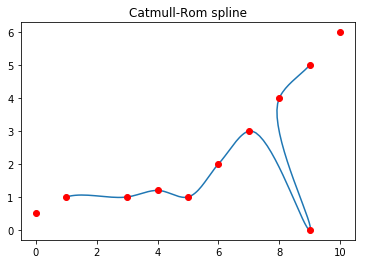

In [136]:
import numpy
import pylab as plt

def CatmullRomSpline(P0, P1, P2, P3, nPoints=20):
  """
  P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
  nPoints is the number of points to include in this curve segment.
  """
  # Convert the points to numpy so that we can do array multiplication
  P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

  # Calculate t0 to t4
  alpha = 0.8
  def tj(ti, Pi, Pj):
    xi, yi = Pi
    xj, yj = Pj
    return ( ( (xj-xi)**2 + (yj-yi)**2 )**0.5 )**alpha + ti

  t0 = 0
  t1 = tj(t0, P0, P1)
  t2 = tj(t1, P1, P2)
  t3 = tj(t2, P2, P3)

  # Only calculate points between P1 and P2
  t = numpy.linspace(t1,t2,nPoints)

  # Reshape so that we can multiply by the points P0 to P3
  # and get a point for each value of t.
  t = t.reshape(len(t),1)
  print(t)
  A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
  A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
  A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3
  print(A1)
  print(A2)
  print(A3)
  B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
  B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

  C  = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
  return C

def CatmullRomChain(P):
  """
  Calculate Catmull Rom for a chain of points and return the combined curve.
  """
  sz = len(P)

  # The curve C will contain an array of (x,y) points.
  C = [];
  for i in range(sz-3):
    c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
    C.extend(c)

  return C

# Define a set of points for curve to go through
Points = [[0,0.5],[1,1],[3,1],[4,1.2],[5,1],[6,2],[7,3],[9,0],[8,4],[9,5],[10,6]]

# Calculate the Catmull-Rom splines through the points
c = CatmullRomChain(Points)

# Convert the Catmull-Rom curve points into x and y arrays and plot
x,y = zip(*c)
plt.plot(x,y)

# Plot the control points
px, py = zip(*Points)
plt.plot(px,py,'or')
plt.title("Catmull-Rom spline")
plt.show()

In [113]:
import numpy as np
import scipy.interpolate as si
import matplotlib.pyplot as plt


def bspline(cv, n=100, degree=3, periodic=False):
    """ Calculate n samples on a bspline

        cv :      Array ov control vertices
        n  :      Number of samples to return
        degree:   Curve degree
        periodic: True - Curve is closed
                  False - Curve is open
    """

    # If periodic, extend the point array by count+degree+1
    cv = np.asarray(cv)
    count = len(cv)

    if periodic:
        factor, fraction = divmod(count+degree+1, count)
        cv = np.concatenate((cv,) * factor + (cv[:fraction],))
        count = len(cv)
        degree = np.clip(degree,1,degree)

    # If opened, prevent degree from exceeding count-1
    else:
        degree = np.clip(degree,1,count-1)


    # Calculate knot vector
    kv = None
    if periodic:
        kv = np.arange(0-degree,count+degree+degree-1,dtype='int')
    else:
        kv = np.concatenate(([0]*degree, np.arange(count-degree+1), [count-degree]*degree))


    # Calculate query range
    u = np.linspace(periodic,(count-degree),n)


    # Calculate result
    return np.array(si.splev(u, (kv,cv.T,degree))).T

Text(0.5,1,'B-splines')

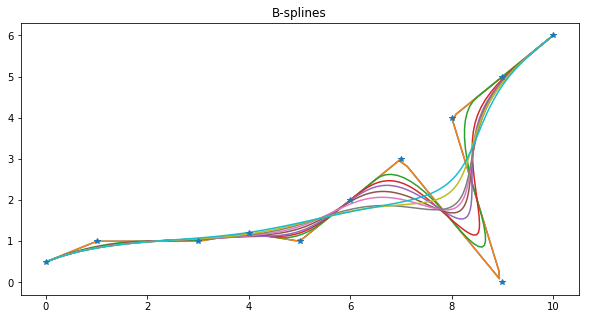

In [117]:
cv = np.array([[ 50.,  25.],
   [ 59.,  12.],
   [ 50.,  10.],
   [ 57.,   2.],
   [ 40.,   4.],
   [ 40.,   14.]])

cv = np.array([[0,0.5],[1,1],[3,1],[4,1.2],[5,1],[6,2],[7,3],
               [9,0],
               [8,4],[9,5],[10,6]])

plt.figure(figsize=(10,5))
for i in range(10):
    plt.plot(*zip(*bspline(cv,100,i,False)))

plt.plot(*zip(*cv),'*')
plt.title("B-splines")


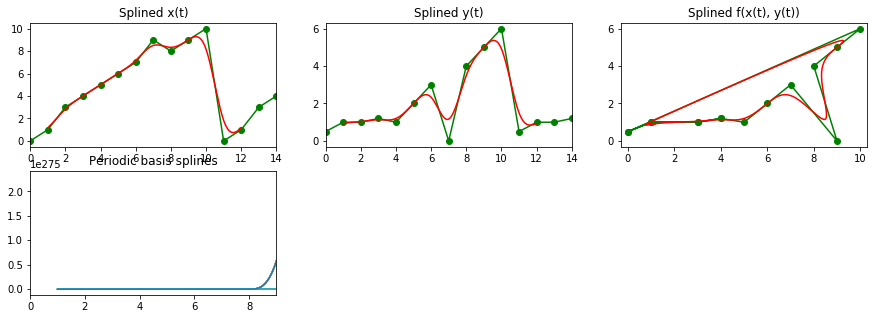

In [62]:
# https://stackoverflow.com/questions/24612626/b-spline-interpolation-with-python?answertab=active#tab-top

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

# points = [[-2, 2], [0, 1], [-2, 0], [0, -1], [-2, -2], [-4, -4], [2, -4], [4, 0], [2, 4], [-4, 4]]
points = [[0,0.5],[1,1],[3,1],[4,1.2],[5,1],[6,2],[7,3],
               [9,0],
               [8,4],[9,5],[10,6]]

degree = 3

points = points + points[0:degree + 1]
points = np.array(points)
n_points = len(points)
x = points[:,0]
y = points[:,1]

t = range(len(x))
ipl_t = np.linspace(1.0, len(points) - degree, 1000)

x_tup = si.splrep(t, x, k=degree, per=1)
y_tup = si.splrep(t, y, k=degree, per=1)
x_list = list(x_tup)
xl = x.tolist()
x_list[1] = [0.0] + xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = [0.0] + yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(n_points - degree - 1):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i)
plt.xlim([0.0, 9.0])
plt.title('Periodic basis splines')

plt.show()

In [68]:
points = np.array([[0,0.5],[1,1],[3,1],[4,1.2],[5,1],[6,2],[7,3],
               [9,0],
               [8,4],[9,5],[10,6]])
knots = np.array([0,1,2,3,4,5,6])
order = 2
result = scipy.interpolate.BSpline(knots,points,order)

In [70]:
print(result)

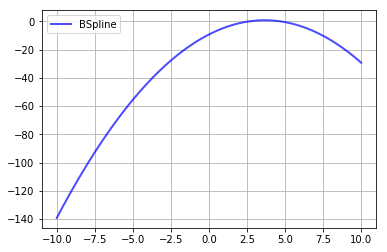

In [111]:
from scipy.interpolate import BSpline
import numpy as np
k = 2
t = [1,2,3,4,5,6]
c = [0,1,0.5,2]
spl = BSpline(t, c, k)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
xx = np.linspace(-10, 10, 100)
# ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=2, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [30]:
spl.c

array([0., 1., 2., 4., 5., 6., 7., 8., 7., 6., 5.])

In [60]:
def B(x, k, i, t):
    if k == 0:
       return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
       c1 = 0.0
    else:
       c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
       c2 = 0.0
    else:
       c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2

def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))

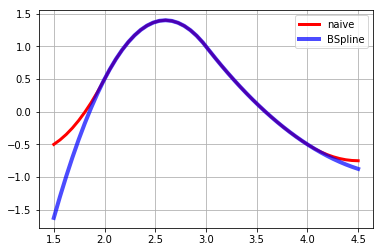

In [86]:
from scipy.interpolate import BSpline
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]
spl = BSpline(t, c, k)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx = np.linspace(1.5, 4.5, 50)
ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

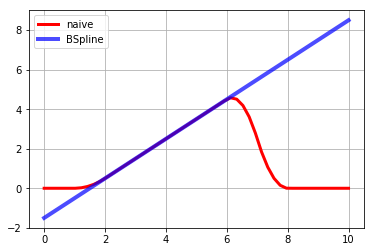

In [69]:
from scipy.interpolate import BSpline
k = 2
t = [0, 1, 2, 3, 4, 5, 6,7,8]
# c = [-1, 2, 0, -1,1,2]
c = [0,1,2,3,4,5,6,7,10]
spl = BSpline(t, c, k)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xx = np.linspace(0, 10, 50)
ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend(loc='best')
plt.show()

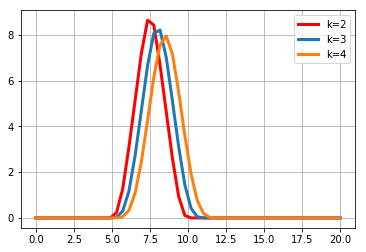

In [110]:
t = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# c = [-1, 2, 0, -1,1,2,3,4,5,6,7,8]
c = [0,0,0,0,0,5,10,5,0,0,0,0]
# xx = [0,1,2,3,4,5,6,7,8,9,10]

xx = np.linspace(0, 20, 50)


plt.plot(xx, [bspline(x, t, c ,2) for x in xx], 'r-', lw=3, label='k=2')
plt.plot(xx, [bspline(x, t, c ,3) for x in xx], lw=3, label='k=3')
plt.plot(xx, [bspline(x, t, c ,4) for x in xx], lw=3, label='k=4')

plt.grid(True)
plt.legend(loc='best')
plt.show()

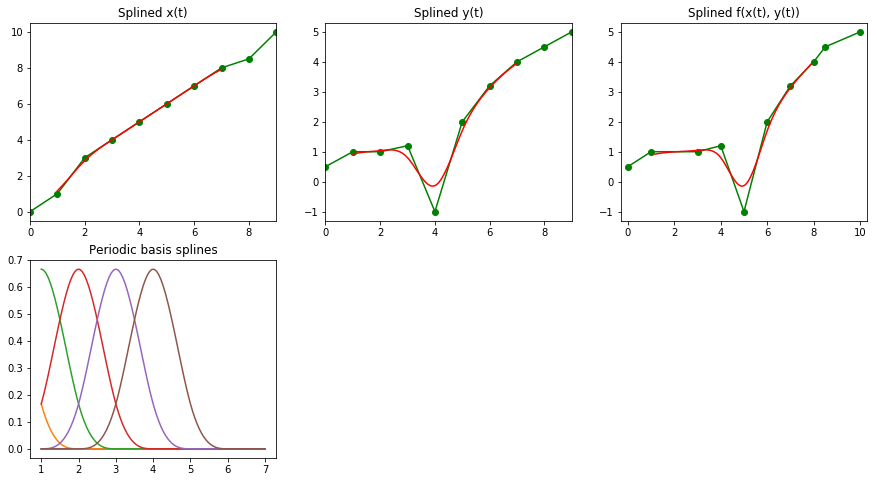

<function matplotlib.pyplot.show(*args, **kw)>

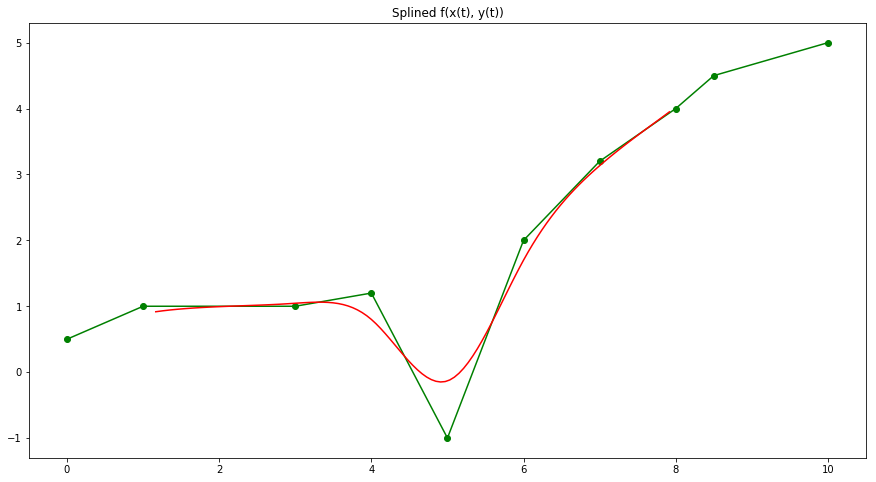

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

# points = [[-2, 2], [0, 1], [-2, 0], [0, -1], [-2, -2], [-4, -4], [2, -4], [4, 0], [2, 4], [-4, 4]]
points = [[0,0.5],[1,1],[3,1],[4,1.2],[5,-1],[6,2],[7,3.2],[8,4],[8.5,4.5],[10,5]]

degree = 3

# points = points + points[0:degree + 1]
points = np.array(points)
n_points = len(points)
x = points[:,0]
y = points[:,1]

t = range(len(x))
ipl_t = np.linspace(1.0, len(points) - degree, 100)

x_tup = si.splrep(t, x, k=degree, per=1)
y_tup = si.splrep(t, y, k=degree, per=1)
x_list = list(x_tup)
xl = x.tolist()
x_list[1] = [0.0] + xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = [0.0] + yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list)
y_i = si.splev(ipl_t, y_list)

#==============================================================================
# Plot
#==============================================================================

fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(231)
plt.plot(t, x, '-og')
plt.plot(ipl_t, x_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined x(t)')

ax = fig.add_subplot(232)
plt.plot(t, y, '-og')
plt.plot(ipl_t, y_i, 'r')
plt.xlim([0.0, max(t)])
plt.title('Splined y(t)')

ax = fig.add_subplot(233)
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.xlim([min(x) - 0.3, max(x) + 0.3])
plt.ylim([min(y) - 0.3, max(y) + 0.3])
plt.title('Splined f(x(t), y(t))')

ax = fig.add_subplot(234)
for i in range(n_points - degree - 1):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i_new = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i_new)
plt.title('Periodic basis splines')

plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(x, y, '-og')
plt.plot(x_i, y_i, 'r')
plt.title('Splined f(x(t), y(t))')
plt.show

Text(0.5,1,'Periodic basis splines')

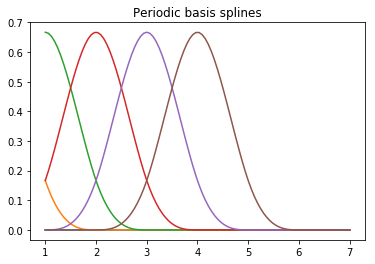

In [259]:
for i in range(n_points - degree - 1):
    vec = np.zeros(11)
    vec[i] = 1.0
    x_list = list(x_tup)
    x_list[1] = vec.tolist()
    x_i_new = si.splev(ipl_t, x_list)
    plt.plot(ipl_t, x_i_new)
plt.title('Periodic basis splines')

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep, BSpline
x = np.linspace(0, 10, 20)
# y = [1,2,3.3,4,-5,6.2,7,8,9,10.1]
np.random.seed(42)
noise = np.random.normal(0,0.1,20)
y = 0.1*x + 1 + noise

y[10] = -3

degree = 3
smoothing = 5
spl = splrep(x, y,k=degree,s=smoothing)

# k = 2
# t = [0, 1, 2, 3, 4, 5, 6,7,8]
t = spl[0]
c = spl[1]
k = spl[2]

spl_BSpline = BSpline(t, c, k)

fig = plt.figure(figsize=(15,8))
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o-')
# plt.plot(x2, y2,lw=3)

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3)

plt.title("B-Spline")
plt.grid(True)
plt.axis('equal')
plt.show()

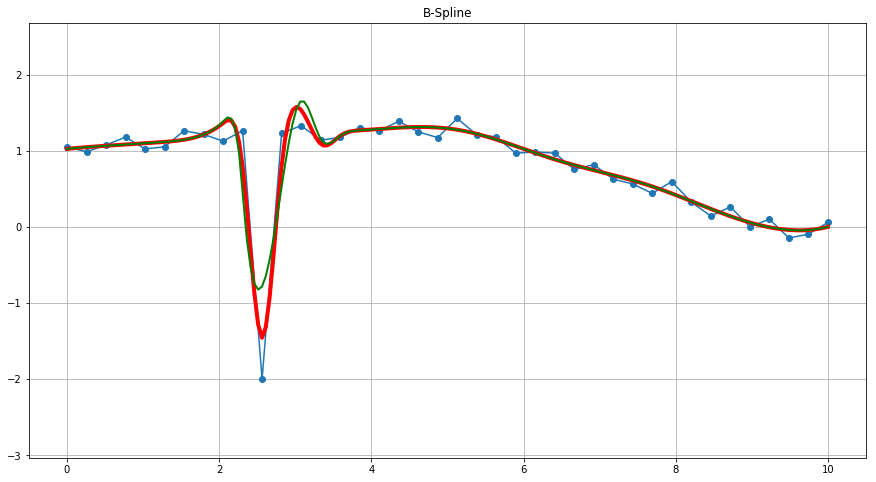

In [414]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep, BSpline
x = np.linspace(0, 10, 40)
# y = [1,2,3.3,4,-5,6.2,7,8,9,10.1]
np.random.seed(42)
noise = np.random.normal(0,0.1,40)
y = 0.1*x*np.sin(0.5*x) + 1 + noise

y[10] = -2

degree = 3
smoothing = 1
spl = splrep(x, y,k=degree,s=smoothing)

# k = 2
# t = [0, 1, 2, 3, 4, 5, 6,7,8]
t = spl[0]
# t = np.linspace(0, 20, 20)
# t = range(len(x))

c = spl[1]
k = spl[2]

spl_BSpline = BSpline(t, c, k)

fig = plt.figure(figsize=(15,8))
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o-')

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3,'r',lw=4)


t_index_to_edit = 8;
t_window = 1
# t [t_index_to_edit-t_window:t_index_to_edit+t_window] = t[t_index_to_edit]
t[t_index_to_edit] = t[t_index_to_edit-1]
t[t_index_to_edit+1] = t[t_index_to_edit+2]

# t = [ 0.        ,  0.        ,  0.        ,  0.        ,  1.1,
#         1.2,  1.3,  1.4,  2.82051282,  2.82051282,
#         3.07692308,  3.33333333,  3.58974359,  3.84615385,  5.12820513,
#         6.41025641,  7.69230769,  8.97435897, 10.        , 10.        ,
#        10.        , 10.        ]

# t = np.array(range(22))
# t[0:4] = 0.0
# t[-1:-5:-1] = 18.0

spl_BSpline = BSpline(t, c, k)

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3,'g',lw=2)

# t = np.linspace(0, 1, 22)
# t[0:4] = 0.0
# t[-1:-5:-1] = 10.0
# t = t*7

# spl_BSpline = BSpline(t, c, k)

# y3 = splev(x2, spl_BSpline)
# plt.plot(x2, y3,'m')

plt.title("B-Spline")
plt.grid(True)
plt.axis('equal')
plt.show()

In [407]:
t

array([0.        , 0.        , 0.        , 0.        , 1.33333333,
       1.66666667, 2.        , 2.33333333, 2.66666667, 3.        ,
       3.33333333, 3.66666667, 4.        , 4.33333333, 4.66666667,
       5.        , 5.33333333, 5.66666667, 7.        , 7.        ,
       7.        , 7.        ])

In [379]:
t = np.array(range(22))
t[0:4] = 0.0
t[-1:-5:-1] = 18.0
t

array([ 0,  0,  0,  0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 18, 18, 18])

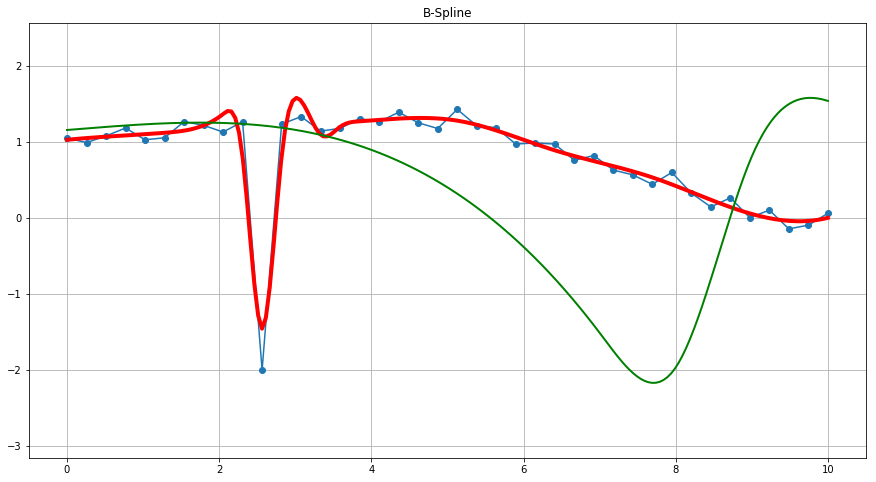

In [421]:
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep, BSpline
x = np.linspace(0, 10, 40)
# y = [1,2,3.3,4,-5,6.2,7,8,9,10.1]
np.random.seed(42)
noise = np.random.normal(0,0.1,40)
y = 0.1*x*np.sin(0.5*x) + 1 + noise

y[10] = -2

degree = 3
smoothing = 1
spl = splrep(x, y,k=degree,s=smoothing)

# k = 2
# t = [0, 1, 2, 3, 4, 5, 6,7,8]
t = spl[0]
# t = np.linspace(0, 20, 20)
# t = range(len(x))

c = spl[1]
k = spl[2]

spl_BSpline = BSpline(t, c, k)

fig = plt.figure(figsize=(15,8))
x2 = np.linspace(0, 10, 200)
y2 = splev(x2, spl)
plt.plot(x, y, 'o-')

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3,'r',lw=4)


t_index_to_edit = 8;
t_window = 1
# t [t_index_to_edit-t_window:t_index_to_edit+t_window] = t[t_index_to_edit]
t[t_index_to_edit] = t[t_index_to_edit-1]
t[t_index_to_edit+1] = t[t_index_to_edit+2]

# t = [ 0.        ,  0.        ,  0.        ,  0.        ,  1.1,
#         1.2,  1.3,  1.4,  2.82051282,  2.82051282,
#         3.07692308,  3.33333333,  3.58974359,  3.84615385,  5.12820513,
#         6.41025641,  7.69230769,  8.97435897, 10.        , 10.        ,
#        10.        , 10.        ]

t = np.array(range(22))
t[0:7] = 0.0
t[-1:-7:-1] = 18.0

spl_BSpline = BSpline(t, c, k)

y3 = splev(x2, spl_BSpline)
plt.plot(x2, y3,'g',lw=2)

# t = np.linspace(0, 1, 22)
# t[0:4] = 0.0
# t[-1:-5:-1] = 10.0
# t = t*7

# spl_BSpline = BSpline(t, c, k)

# y3 = splev(x2, spl_BSpline)
# plt.plot(x2, y3,'m')

plt.title("B-Spline")
plt.grid(True)
plt.axis('equal')
plt.show()